### neuralprophet_Korea, South confirmed cases demo

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import floor
from neuralprophet import NeuralProphet

In [2]:
CONFIRMED_PATH = r"C:\Users\offco\Documents\Dev_Projects\JHUCovidDatasetAnP\modified\confirmed"
data = pd.read_csv(CONFIRMED_PATH + "/confirmed_korea, south.csv")

In [3]:
data.head()

,Date,"Korea, South"
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


In [4]:
data.rename(columns={'Date': 'ds', 'Korea, South': 'y'}, inplace=True)
data['ds'] = data['ds'].apply(lambda x: pd.to_datetime(x))
data.head()

,ds,y
0,2020-01-22,1
1,2020-01-23,1
2,2020-01-24,2
3,2020-01-25,2
4,2020-01-26,3


### Recent 2.5% Prediction

In [5]:
def train_test_split(df, test_size):
    
    test_size = floor(len(df)*test_size)
    train_data = df[:-test_size]
    test_data = df[-test_size:]
    
    return [train_data, test_data]

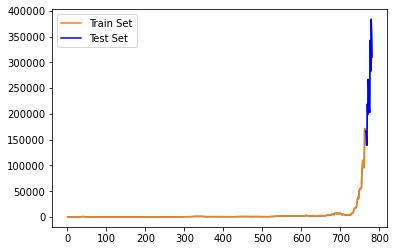

In [6]:
train_data, test_data = train_test_split(data, 0.025)

plt.plot(data['y'].diff())
plt.plot(train_data['y'].diff(), label='Train Set')
plt.plot(test_data['y'].diff(), label='Test Set', color='Blue')
plt.legend()

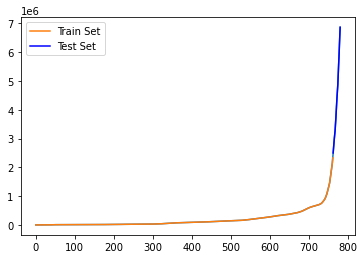

In [12]:
plt.plot(data['y'])
plt.plot(train_data['y'], label='Train Set')
plt.plot(test_data['y'], label='Test Set', color='Blue')
plt.legend()

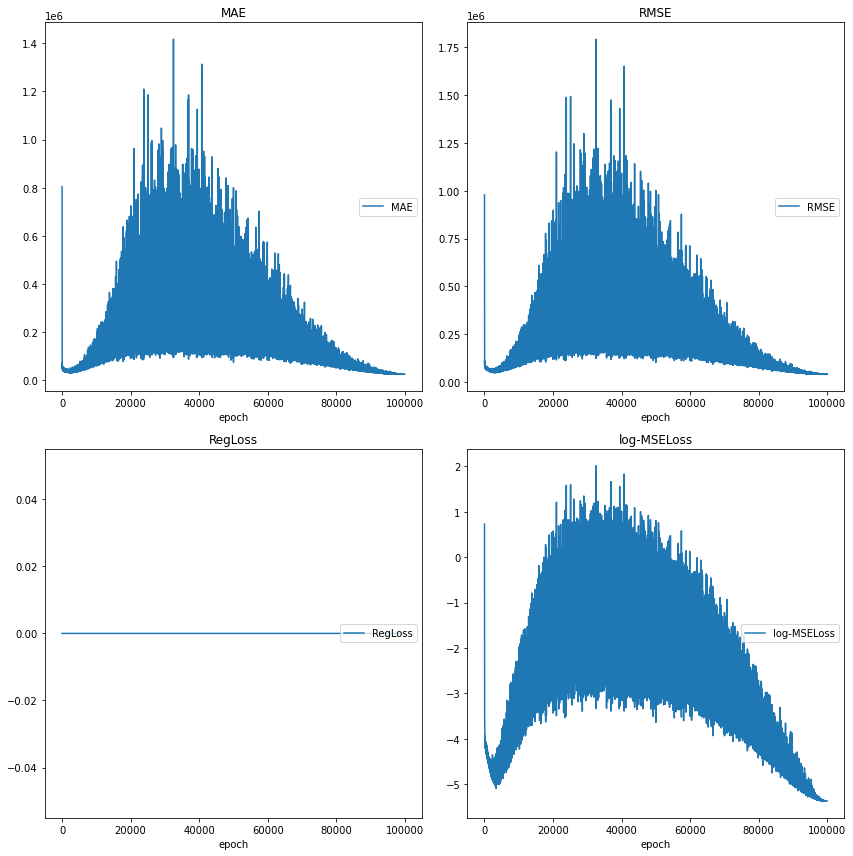

MAE
	MAE              	 (min: 24902.689, max: 1416982.475, cur: 25870.461)
RMSE
	RMSE             	 (min: 39211.322, max: 1793472.963, cur: 41085.312)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-MSELoss
	log-MSELoss      	 (min:   -5.369, max:    2.012, cur:   -5.369)


,MSELoss,MAE,RMSE,RegLoss
0,2.069741,804775.593155,978859.836788,0.0
1,1.256696,628913.349406,766743.088767,0.0
2,0.769492,489458.247587,594265.482131,0.0
3,0.476985,382250.926847,469335.086321,0.0
4,0.311809,301689.498524,376408.807340,0.0
...,...,...,...,...
99995,0.004660,25872.148770,40035.354693,0.0
99996,0.004660,25870.990334,41286.322055,0.0
99997,0.004660,25870.198907,41016.586697,0.0
99998,0.004660,25871.663855,40904.606647,0.0


In [7]:
m1 = NeuralProphet(epochs=10**5, loss_func='MSE')
m1.fit(train_data, freq='D', progress='plot-all')

In [8]:
preds = m1.predict(test_data)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.737% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 94.737% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


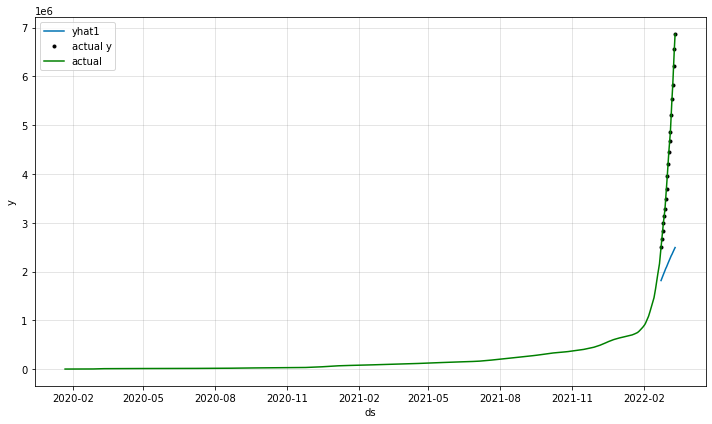

In [9]:
fig1 = m1.plot(preds)
plt.plot(data['ds'], data['y'], 'g-', label='actual')
plt.legend()

### Upcoming 30-Days Prediction

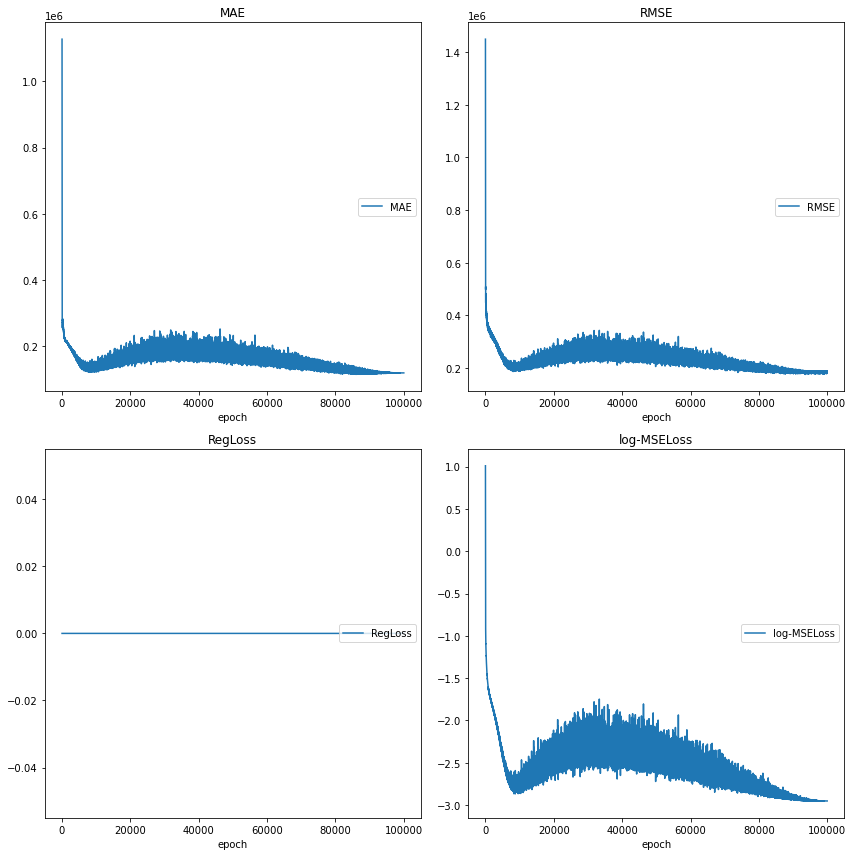

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.872% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


MAE
	MAE              	 (min: 114508.311, max: 1127747.679, cur: 119151.785)
RMSE
	RMSE             	 (min: 175694.117, max: 1449136.544, cur: 188192.942)
RegLoss
	RegLoss          	 (min:    0.000, max:    0.000, cur:    0.000)
log-MSELoss
	log-MSELoss      	 (min:   -2.952, max:    1.010, cur:   -2.951)


In [10]:
m2 = NeuralProphet(epochs=10**5, loss_func='MSE')
m2.fit(data, freq='D', progress='plot-all')
fut_30 = m2.make_future_dataframe(data, periods=30)
fut_preds = m2.predict(fut_30)

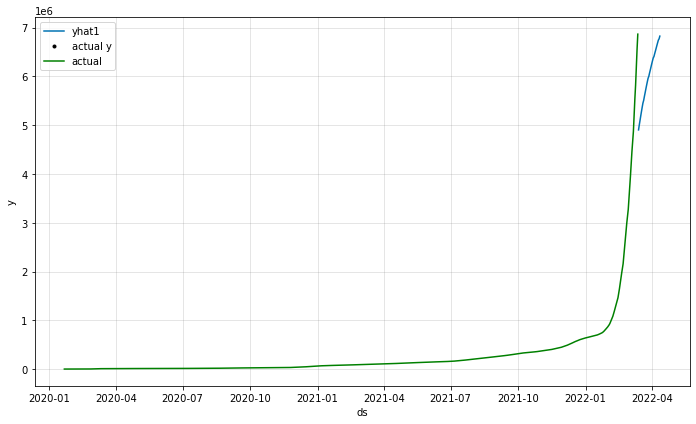

In [11]:
fig2 = m2.plot(fut_preds)
plt.plot(data['ds'], data['y'], 'g-', label='actual')
plt.legend()